In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
full_df = pd.read_csv('data/raw/owid-covid-data.csv')
full_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
full_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
'''
We note that there are some countries with NA in all values/dates of some columns. We may need to remove these countries from the analyses
for those variables since the numbers are not available (and not 0)

iso_all_na_df is the df which contains True if index country has all na in a column value
'''

# Group by 'iso_code' and check if all values in specified columns are NA for each country
iso_all_na_df = full_df.groupby('iso_code')[full_df.columns].apply(lambda x: x.isna().all())

# Print example of columns of ABW that are all NA
print(iso_all_na_df.loc['ABW'][iso_all_na_df.loc['ABW']==True])
iso_all_na_df.head()

reproduction_rate                     True
icu_patients                          True
icu_patients_per_million              True
hosp_patients                         True
hosp_patients_per_million             True
weekly_icu_admissions                 True
weekly_icu_admissions_per_million     True
weekly_hosp_admissions                True
weekly_hosp_admissions_per_million    True
new_tests_smoothed                    True
new_tests_smoothed_per_thousand       True
positive_rate                         True
tests_per_case                        True
total_boosters                        True
total_boosters_per_hundred            True
extreme_poverty                       True
cardiovasc_death_rate                 True
female_smokers                        True
male_smokers                          True
handwashing_facilities                True
hospital_beds_per_thousand            True
human_development_index               True
Name: ABW, dtype: bool


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
iso_code,,,,,,,,,,,,,,,,,,,,,
ABW,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,True,False,False,False,False,False
AFG,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,True,True,True
AGO,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,True,True,True,True
AIA,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,True,False,True,True,True,True
ALB,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [5]:
# Example of checking which countries are all NA for a column
print(iso_all_na_df.index[iso_all_na_df['icu_patients']==True])

# Example of checking which countrie are NOT all NA for a list of columns
na_cols = ['icu_patients', 'positive_rate']
print(iso_all_na_df.index[(iso_all_na_df[na_cols]==False).all(axis=1)])

Index(['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARM', 'ASM', 'ATG',
       ...
       'VEN', 'VGB', 'VIR', 'VNM', 'VUT', 'WLF', 'WSM', 'YEM', 'ZMB', 'ZWE'],
      dtype='object', name='iso_code', length=213)
Index(['ARG', 'AUS', 'AUT', 'BEL', 'BGR', 'BOL', 'CAN', 'CHE', 'CHL', 'CYP',
       'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'IRL', 'ISR',
       'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 'MLT', 'MYS', 'NLD', 'PRT',
       'ROU', 'SRB', 'SVK', 'SVN', 'SWE', 'USA', 'ZAF'],
      dtype='object', name='iso_code')


## Exploratory plots

### Timeseries Heatmap

Let us look at some heatmaps of new_cases_smoothed_per_million, new_deaths_per_million and new_vaccinations_smoothed_per_million.

Predictors are:
            'people_fully_vaccinated_per_hundred', 'new_cases_smoothed_per_million', 'tests_per_case',
             'new_vaccinations_smoothed_per_million', 'population_density', 'median_age', 'aged_65_older',
             'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 
             'male_smokers', 'female_smokers', 'hospital_beds_per_thousand', 
             'life_expectancy', 'human_development_index', 'stringency_index'

Our response is new_deaths_smoothed_per_million, weekly_icu_admissions_per_million, weekly_hosp_admissions_per_million

In [6]:
# List of countries that have all columns with at least some info reported for response
plot_cols = ['weekly_icu_admissions_per_million', 'new_deaths_smoothed_per_million', 'weekly_hosp_admissions_per_million', 
             'people_fully_vaccinated_per_hundred', 'new_cases_smoothed_per_million', 'tests_per_case',
             'new_vaccinations_smoothed_per_million', 'population_density', 'median_age', 'aged_65_older',
             'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 
             'male_smokers', 'female_smokers', 'hospital_beds_per_thousand', 
             'life_expectancy', 'human_development_index', 'stringency_index']
countries_to_plot = iso_all_na_df.index[(iso_all_na_df[plot_cols]==False).all(axis=1)]
print(countries_to_plot)


# List of relevant columns
relevant_cols = ['iso_code', 'date',
                'weekly_icu_admissions_per_million', 'new_deaths_smoothed_per_million', 'weekly_hosp_admissions_per_million', 
                'people_fully_vaccinated_per_hundred', 'new_cases_smoothed_per_million', 'tests_per_case',
                'new_vaccinations_smoothed_per_million', 'population_density', 'median_age', 'aged_65_older',
                'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 
                'male_smokers', 'female_smokers', 'hospital_beds_per_thousand', 
                'life_expectancy', 'human_development_index', 'stringency_index']

# Filter out the relevant countries
no_na_df = full_df[full_df['iso_code'].isin(countries_to_plot)][relevant_cols]


Index(['CHL', 'CYP', 'CZE', 'DEU', 'ESP', 'EST', 'FRA', 'GRC', 'HUN', 'IRL',
       'ISR', 'ITA', 'KOR', 'LUX', 'LVA', 'MLT', 'NLD', 'NOR', 'SGP', 'SVK',
       'SVN'],
      dtype='object', name='iso_code')


Some of the variables like life expectancy should be relatively constant and never 0. Thus we check that these entries are constant and if not we enforce them to be constant (if NA).

Time-series predictors are:

            'people_fully_vaccinated_per_hundred', 'new_cases_smoothed_per_million', 'tests_per_case',
            'new_vaccinations_smoothed_per_million', 'stringency_index'

Constant predictors are:

             'population_density', 'median_age', 'aged_65_older',
             'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 
             'male_smokers', 'female_smokers', 'hospital_beds_per_thousand', 
             'life_expectancy', 'human_development_index'

Our response are:

            'new_deaths_smoothed_per_million', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million'

In [7]:
# List of constant predictor variables
constant_columns = ['population_density', 'median_age', 'aged_65_older',
                    'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence',
                    'male_smokers', 'female_smokers', 'hospital_beds_per_thousand',
                    'life_expectancy', 'human_development_index']

# Iterate through each country and enforce constant values for constant variables
for iso_code, country_data in no_na_df.groupby('iso_code'):
    for column in constant_columns:
        mask = (country_data[column] == 0)
        if mask.all():  # If all values in the column are 0
            print(f'All data in {iso_code}, {column} is 0.')
            continue
        if mask.any():  # Check if any non-zero value exists
            constant_value = country_data[mask, column].iloc[0]  # Get the first non-zero value
            country_data.loc[~mask, column] = constant_value  # Fill 0 values with the constant value

        constant_value = country_data[column].iloc[0]  # Get the first value
        country_data.loc[:, column] = constant_value  # Set all values in the column to the constant value

print("DataFrame after enforcing constant values:")
no_na_df

DataFrame after enforcing constant values:


,iso_code,date,weekly_icu_admissions_per_million,new_deaths_smoothed_per_million,weekly_hosp_admissions_per_million,people_fully_vaccinated_per_hundred,new_cases_smoothed_per_million,tests_per_case,new_vaccinations_smoothed_per_million,population_density,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,male_smokers,female_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,stringency_index
67521,CHL,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67522,CHL,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67523,CHL,2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67524,CHL,2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67525,CHL,2020-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335211,ESP,2024-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.105,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,NaN
335212,ESP,2024-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.105,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,NaN
335213,ESP,2024-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.105,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,NaN
335214,ESP,2024-04-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.105,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,NaN


In [8]:
time_dependent_cols = ['people_fully_vaccinated_per_hundred',
                        'new_deaths_smoothed_per_million', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million',
                        'new_cases_smoothed_per_million', 'tests_per_case', 'new_vaccinations_smoothed_per_million', 'stringency_index']

# Function to interpolate missing values within each group
def interpolate_group(group):
    group['people_fully_vaccinated_per_hundred'] = group['people_fully_vaccinated_per_hundred'].interpolate().ffill().fillna(0)
    return group

    
# First note that cumulative (non-decreasing) data like fully_vaccinated cannot be filled with 0s in the middle and end
no_na_df = no_na_df.groupby('iso_code',group_keys=False).apply(interpolate_group)

# We don't want to fill a cumulative (non-decreasing) data like fully_vaccinated with 0s
no_na_df[time_dependent_cols[1:]] = no_na_df[time_dependent_cols[1:]].fillna(value=0)
no_na_df

,iso_code,date,weekly_icu_admissions_per_million,new_deaths_smoothed_per_million,weekly_hosp_admissions_per_million,people_fully_vaccinated_per_hundred,new_cases_smoothed_per_million,tests_per_case,new_vaccinations_smoothed_per_million,population_density,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,male_smokers,female_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,stringency_index
67521,CHL,2020-01-05,0.0,0.0,0.0,0.00,0.0,0.0,0.0,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67522,CHL,2020-01-06,0.0,0.0,0.0,0.00,0.0,0.0,0.0,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67523,CHL,2020-01-07,0.0,0.0,0.0,0.00,0.0,0.0,0.0,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67524,CHL,2020-01-08,0.0,0.0,0.0,0.00,0.0,0.0,0.0,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67525,CHL,2020-01-09,0.0,0.0,0.0,0.00,0.0,0.0,0.0,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335211,ESP,2024-04-17,0.0,0.0,0.0,85.66,0.0,0.0,0.0,93.105,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,0.0
335212,ESP,2024-04-18,0.0,0.0,0.0,85.66,0.0,0.0,0.0,93.105,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,0.0
335213,ESP,2024-04-19,0.0,0.0,0.0,85.66,0.0,0.0,0.0,93.105,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,0.0
335214,ESP,2024-04-20,0.0,0.0,0.0,85.66,0.0,0.0,0.0,93.105,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,0.0


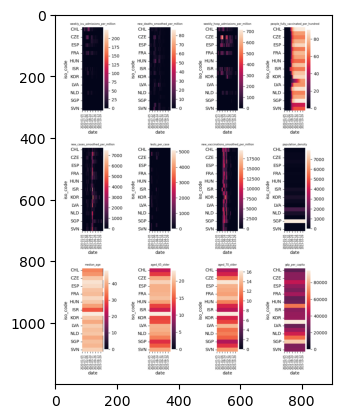

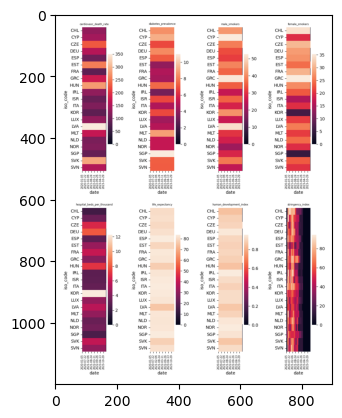

In [9]:
import matplotlib.image as mpimg
import os

# split the img because too big
img_path = 'output/heatmap_plot1.png'
if os.path.exists(img_path):
    img = mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.show()
else:
    # Heat Plotting all columns
    plt.figure(figsize=(9, 12))
    for i, col in enumerate(plot_cols[:12]):
        temp_df = no_na_df.pivot(index='iso_code', columns='date', values=col).fillna(0)
        ax = plt.subplot(3, 4, i+1)
        sns.heatmap(temp_df, ax=ax)
        ax.set_title(col, fontsize=6)  # Increase title font size
        plt.xticks(size=6)  # Rotate x-axis labels
    plt.tight_layout(pad=2.0)  # Increase spacing between subplots
    plt.savefig(img_path)
    plt.show()

img_path = 'output/heatmap_plot2.png'
if os.path.exists(img_path):
    img = mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.show()
else:
    # Heat Plotting all columns
    plt.figure(figsize=(9, 12))
    for i, col in enumerate(plot_cols[12:]):
        temp_df = no_na_df.pivot(index='iso_code', columns='date', values=col).fillna(0)
        ax = plt.subplot(2, 4, i+1)
        sns.heatmap(temp_df, ax=ax)
        ax.set_title(col, fontsize=6)  # Increase title font size
        plt.xticks(size=6)  # Rotate x-axis labels
    plt.tight_layout(pad=2.0)  # Increase spacing between subplots
    plt.savefig(img_path)
    plt.show()
    

Note that in the above we see black stripes (on the right) in some country data because there are some dates where the country has no entries. This isn't a problem datawise

### ACF and PACF

We would now like to look at ACF and PACF as it helps to determine the parameters and suitability for the ARIMA model. We first check stationarity of our response variables.

In [10]:
from statsmodels.tsa.stattools import adfuller

def get_stationary(series):
    '''
    Returns the p-value of ADF statistic for an input series
    '''
    result = adfuller(series.values)

    return result[1]

#'new_deaths_smoothed_per_million', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million'
stationary_death = no_na_df.groupby('iso_code').apply(lambda group: get_stationary(group['new_deaths_smoothed_per_million']))
stationary_icu = no_na_df.groupby('iso_code').apply(lambda group: get_stationary(group['weekly_icu_admissions_per_million']))
stationary_hosp = no_na_df.groupby('iso_code').apply(lambda group: get_stationary(group['weekly_hosp_admissions_per_million']))

adf_df = pd.concat([stationary_death, stationary_icu, stationary_hosp], axis=1).rename(columns={0: 'p-value of death', 1: 'p-values of ICU admissions', 2: 'p-values of hospital admissions'})
adf_df.index.name='ISO code'
adf_df.to_csv('output/adfstat.csv')

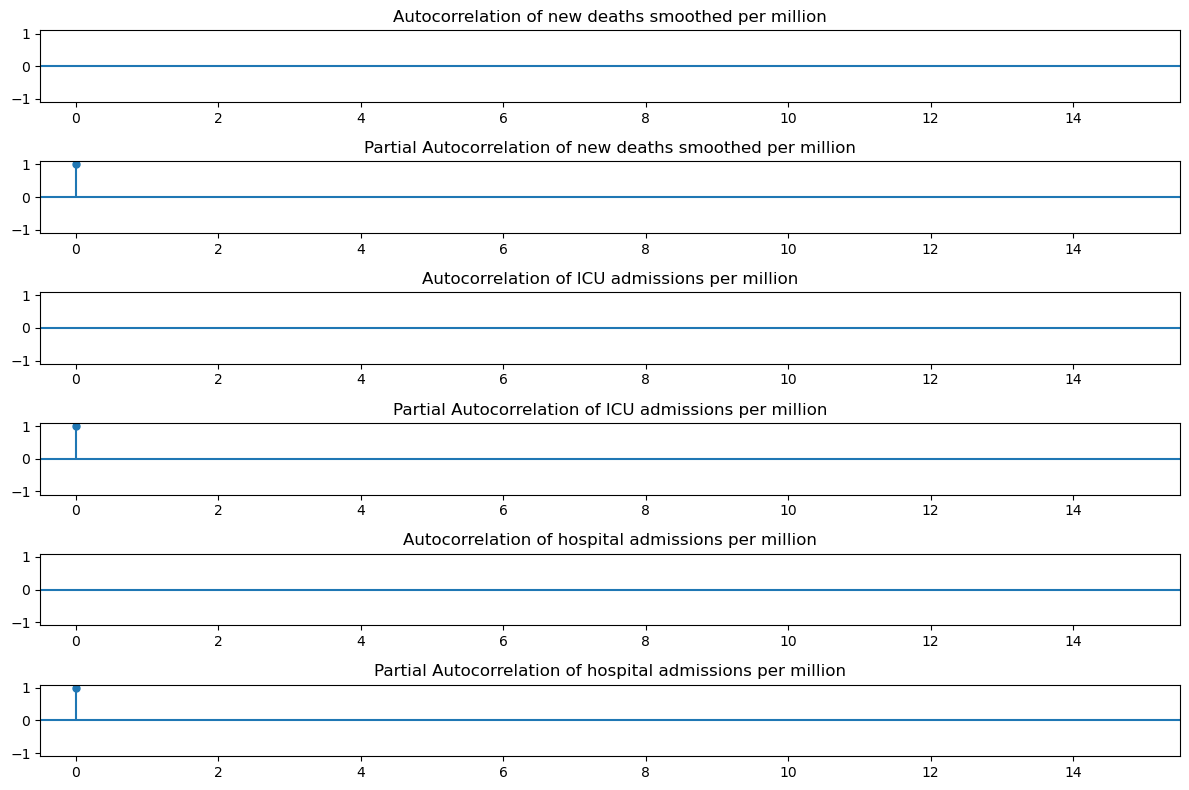

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(12, 8))
plot_acf(no_na_df.pivot(index='iso_code', columns='date', values='new_deaths_smoothed_per_million').loc['SGP'].values, 
         ax=ax[0], lags=15, title='Autocorrelation of new deaths smoothed per million')
plot_pacf(no_na_df.pivot(index='iso_code', columns='date', values='new_deaths_smoothed_per_million').loc['SGP'].values, 
          ax=ax[1], lags=15, title='Partial Autocorrelation of new deaths smoothed per million')

plot_acf(no_na_df.pivot(index='iso_code', columns='date', values='weekly_icu_admissions_per_million').loc['SGP'].values, 
         ax=ax[2], lags=15, title='Autocorrelation of ICU admissions per million')
plot_pacf(no_na_df.pivot(index='iso_code', columns='date', values='weekly_icu_admissions_per_million').loc['SGP'].values, 
         ax=ax[3], lags=15, title='Partial Autocorrelation of ICU admissions per million')

plot_acf(no_na_df.pivot(index='iso_code', columns='date', values='weekly_hosp_admissions_per_million').loc['SGP'].values, 
         ax=ax[4], lags=15, title='Autocorrelation of hospital admissions per million')
plot_pacf(no_na_df.pivot(index='iso_code', columns='date', values='weekly_hosp_admissions_per_million').loc['SGP'].values, 
          ax=ax[5], lags=15, title='Partial Autocorrelation of hospital admissions per million')

for i in range(6):
    ax[i].set_xlim([-0.5, 15.5])
    ax[i].set_ylim([-1.1, 1.1])
    
plt.tight_layout()
plt.savefig('output/acf.png')
plt.show()

From the plots above it suggests that any ARIMA model will perform poorly on 'new_deaths_smoothed_per_million', 'weekly_hosp_admissions_per_million' and 'weekly_icu_admissions_per_million' as there's little to no correlation. This makes sense since we expect them to be a function of case numbers and various other factors. 

# Preprocessing and Helpful Functions

In [12]:
time_dep_variables = ['people_fully_vaccinated_per_hundred', 'new_cases_smoothed_per_million', 'tests_per_case',
            'new_vaccinations_smoothed_per_million', 'stringency_index']
response_variables = ['new_deaths_smoothed_per_million', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million']
const_variables = ['population_density', 'median_age', 'aged_65_older',
                  'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence',
                  'male_smokers', 'female_smokers', 'hospital_beds_per_thousand',
                  'life_expectancy', 'human_development_index']

In [13]:
# Define a function for shifting and splitting dataset
def add_shift_predictors(df, shift):
    '''
    Adds predictors based on shift and then drops all rows that are NA

    Inputs:
    df is the full dataframe with all the variables
    shift is an integer determining the number of days in the past to look at
    '''
    lag_df = df.copy()
    # Create lag features for predictors
    for feature in time_dep_variables+response_variables:
        for i in range(1, shift + 1):
            lag_df[f'{feature}_lag_{i}'] = df.groupby('iso_code')[feature].shift(i)
    lag_df = lag_df.dropna()

    return lag_df

# Define a function for splitting dataframe 
def split_xy(df):
    '''
    Splits dataframe into x and y

    Inputs:
    df is the full dataframe with all the variables with the shift predictors
    '''
    x = df.drop(columns=response_variables+['iso_code', 'date']+time_dep_variables)
    y = df[response_variables]
    return x, y

There are 2 ways we can split train and test sets.
1. We can split by countries and train our data that way
2. We can split by time and train our data that way

Using the first method is problematic in our opinion since often the different country data is correlated (for the same time period). This is problematic since it may just cause data leakage from the test set. As such we use the second method, splitting our train and test sets by time. 

We first split the data (chronologically) into train and test sets with a $0.9$-$0.1$ ratio. We then perform training/validation on the train set and finally evaluate the performance on the test set.

In [18]:
train_df = no_na_df.groupby('iso_code', group_keys=False).apply(lambda group: group.iloc[:9*len(group.index)//10,:])
test_df = no_na_df.groupby('iso_code', group_keys=False).apply(lambda group: group.iloc[9*len(group.index)//10:,:])
train_df

,iso_code,date,weekly_icu_admissions_per_million,new_deaths_smoothed_per_million,weekly_hosp_admissions_per_million,people_fully_vaccinated_per_hundred,new_cases_smoothed_per_million,tests_per_case,new_vaccinations_smoothed_per_million,population_density,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,male_smokers,female_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,stringency_index
67521,CHL,2020-01-05,0.0,0.000,0.0,0.00,0.000,0.0,0.0,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67522,CHL,2020-01-06,0.0,0.000,0.0,0.00,0.000,0.0,0.0,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67523,CHL,2020-01-07,0.0,0.000,0.0,0.00,0.000,0.0,0.0,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67524,CHL,2020-01-08,0.0,0.000,0.0,0.00,0.000,0.0,0.0,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67525,CHL,2020-01-09,0.0,0.000,0.0,0.00,0.000,0.0,0.0,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324071,SVN,2023-11-12,0.0,1.752,0.0,57.66,32.954,0.0,0.0,102.619,...,12.930,31400.840,153.493,7.25,25.0,20.1,4.50,81.32,0.917,0.0
324072,SVN,2023-11-13,0.0,1.752,0.0,57.66,32.954,0.0,0.0,102.619,...,12.930,31400.840,153.493,7.25,25.0,20.1,4.50,81.32,0.917,0.0
324073,SVN,2023-11-14,0.0,1.752,0.0,57.66,32.954,0.0,0.0,102.619,...,12.930,31400.840,153.493,7.25,25.0,20.1,4.50,81.32,0.917,0.0
324074,SVN,2023-11-15,0.0,1.752,0.0,57.66,32.954,0.0,0.0,102.619,...,12.930,31400.840,153.493,7.25,25.0,20.1,4.50,81.32,0.917,0.0


We also scale the data such that they lie in the interval $[0,1]$

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Rescale dataframes into [0,1]
x_scaler = MinMaxScaler()
train_df[time_dep_variables+const_variables] = x_scaler.fit_transform(train_df[time_dep_variables+const_variables])
y_scaler = MinMaxScaler()
train_df[response_variables] = y_scaler.fit_transform(train_df[response_variables])

test_df[time_dep_variables+const_variables] = x_scaler.transform(test_df[time_dep_variables+const_variables])
test_df[response_variables] = y_scaler.transform(test_df[response_variables])


# Linear Model

We want to look at the following hyperparameters:
1. Ridge vs LASSO regression (L1 or L2 regularisation loss)
2. Magnitude of regularisation
3. Number of days prior to fit the linear model

To choose the best set of hyperparameters, we use walk-forward validating. We look at 5 splits where for each country we look at length of the country data (note that this varies), then split it into 6 pieces chronologically (say $B_1, B_2, ..., B_6$ reprenting the 6 blocks of data). At split $i$, we train on $\cup_{j\leq i}B_j$ (of all the countries) and validate on $B_{i+1}$. 

In [20]:
from sklearn import linear_model

def train_lm(df, shift, reg_type, alpha, n_splits=5):
    '''
    Trains a linear regression model on df using walk-forward validation and hyperparameter choice
    
    Inputs:
    df is the dataframe which should have all the columns of original dataset
    shift is an integer representing the number of days in the past to use as forecast
    reg_type should be a string with 'lasso' represeting LASSO regularisation
        or 'ridge' for ridge regularisation
    alpha is the float representing the magnitude of regularisation
    n_splits is the number of splits (note that this means the technically the data is split into
        n_splits+1 pieces) for walk-forward validation

    Returns:
    scores a list (of length n_splits) containing the R^2 validation scores of all splits
    '''
    lag_df = add_shift_predictors(df, shift)
    
    scores = []
    # Walk-forward validation
    for i in range(n_splits):
        # Get the different blocks of data for training and validation
        train_df = lag_df.groupby('iso_code').apply(lambda group: group.iloc[:(i+1)*len(group.index)//(n_splits+1),:])
        val_df = lag_df.groupby('iso_code').apply(lambda group: group.iloc[(i+1)*len(group.index)//(n_splits+1):(i+2)*len(group.index)//(n_splits+1),:])

        # Drop irrelevant columns to get x,y
        x_train, y_train = split_xy(train_df)
        x_val, y_val = split_xy(val_df)

        if reg_type == 'lasso':
            model = linear_model.LassoLars(alpha=alpha)
            model.fit(x_train, y_train)
            split_score = model.score(x_val, y_val)
        elif reg_type == 'ridge':
            model = linear_model.Ridge(alpha=alpha)
            model.fit(x_train, y_train)
            split_score = model.score(x_val, y_val)
        scores.append(split_score)
        
    return scores

train_lm(train_df, shift=3, reg_type='ridge', alpha=0.001, n_splits=5)

[0.8324868710522993,
 0.6862110515980859,
 0.4858373763948501,
 0.7911095121066891,
 0.4923187545636755]

In [21]:
import os
alpha_list = [1e-4, 1e-3, 1e-2, 1e-1, 1., 1e1, 1e2]
reg_type_list = ['lasso','ridge']
shift_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

results_path = 'output/lm_results.csv'
if os.path.exists(results_path):
    results_df = pd.read_csv(results_path)
else:
    results_scores = []
    for alpha in alpha_list:
        for reg_type in reg_type_list:
            for shift in shift_list:
                scores = train_lm(train_df, shift=shift, reg_type=reg_type, alpha=alpha)
                mean_score = np.mean(scores)
                results_scores.append({
                'shift': shift,
                'regularisation type': reg_type,
                'regularisation magnitude': alpha,
                'validation score': mean_score
                })

    # Convert scores to DataFrame
    results_df = pd.DataFrame(results_scores)
    results_df.to_csv(results_path)

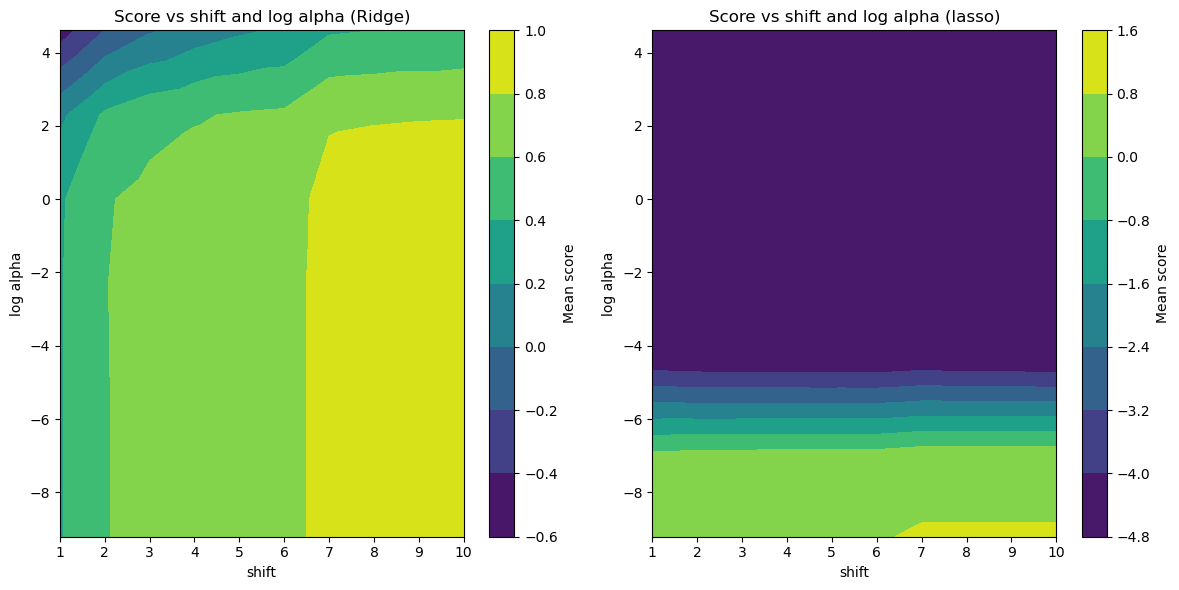

In [22]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot contour plot for Ridge 
contour1 = axes[0].tricontourf(results_df[results_df['regularisation type']=='ridge']['shift'].values, 
                        np.log(results_df[results_df['regularisation type']=='ridge']['regularisation magnitude'].values),
                        results_df[results_df['regularisation type']=='ridge']['validation score'].values, cmap='viridis')
fig.colorbar(contour1, ax=axes[0], label='Mean score')
axes[0].set_xlabel('shift')
axes[0].set_ylabel('log alpha')
axes[0].set_title('Score vs shift and log alpha (Ridge)')

# Plot contour plot for Ridge 
contour2 = axes[1].tricontourf(results_df[results_df['regularisation type']=='lasso']['shift'].values, 
                        np.log(results_df[results_df['regularisation type']=='lasso']['regularisation magnitude'].values),
                        results_df[results_df['regularisation type']=='lasso']['validation score'].values, cmap='viridis')
fig.colorbar(contour2, ax=axes[1], label='Mean score')
axes[1].set_xlabel('shift')
axes[1].set_ylabel('log alpha')
axes[1].set_title('Score vs shift and log alpha (lasso)')

# Adjust layout
plt.tight_layout()

plt.savefig('output/lm_plot.png')
# Show the plot
plt.show()

# Random Forest Model

In [23]:
from sklearn.ensemble import RandomForestRegressor

# By default uses CID for random seed.
def train_rf(df, shift, max_depth, bootstrap, seed=1843091, n_splits=5):
    '''
    Trains a random forest model on df using walk-forward validation and hyperparameter choice
    
    Inputs:
    df is the dataframe which should have all the columns of original dataset
    shift is an integer representing the number of days in the past to use as forecast
    max_depth is an integer representing the maximum depth of the tree. Can also be set to 
        None if no maximum depth
    bootstrap is a boolean representing whether to bootstrap samples of data 
    n_splits is the number of splits (note that this means the technically the data is split into
        n_splits+1 pieces) for walk-forward validation

    Returns:
    scores a list (of length n_splits) containing the R^2 validation scores of all splits
    '''
    lag_df = add_shift_predictors(df, shift)
    
    scores = []
    # Walk-forward validation
    for i in range(n_splits):
        # Get the different blocks of data for training and validation
        train_df = lag_df.groupby('iso_code').apply(lambda group: group.iloc[:(i+1)*len(group.index)//(n_splits+1),:])
        val_df = lag_df.groupby('iso_code').apply(lambda group: group.iloc[(i+1)*len(group.index)//(n_splits+1):(i+2)*len(group.index)//(n_splits+1),:])

        # Drop irrelevant columns to get x,y
        x_train, y_train = split_xy(train_df)
        x_val, y_val = split_xy(val_df)

        model = RandomForestRegressor(max_depth=max_depth, bootstrap=bootstrap, random_state=seed, n_jobs=-1)
        model.fit(x_train, y_train)
        split_score = model.score(x_val, y_val)
        scores.append(split_score)
        
    return scores

train_rf(train_df, shift=3, bootstrap=True, max_depth=None)

[0.7341261546960988,
 0.5670913284123197,
 0.15318465617884447,
 0.7285316027527236,
 0.5978645692479416]

In [24]:
max_depth_list = [5, 10, 20, 40, None]
bootstrap_list = [True, False]
shift_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

results_path = 'output/rf_results.csv'
if os.path.exists(results_path):
    results_df = pd.read_csv(results_path)
else:
    results_scores = []
    for max_depth in max_depth_list:
        for bootstrap in bootstrap_list:
            for shift in shift_list:
                scores = train_rf(train_df, shift=shift, bootstrap=bootstrap, max_depth=max_depth)
                mean_score = np.mean(scores)
                results_scores.append({
                'shift': shift,
                'max depth': max_depth,
                'bootstrap': bootstrap,
                'validation score': mean_score
                })

    # Convert scores to DataFrame
    results_df = pd.DataFrame(results_scores)
    results_df.to_csv(results_path)

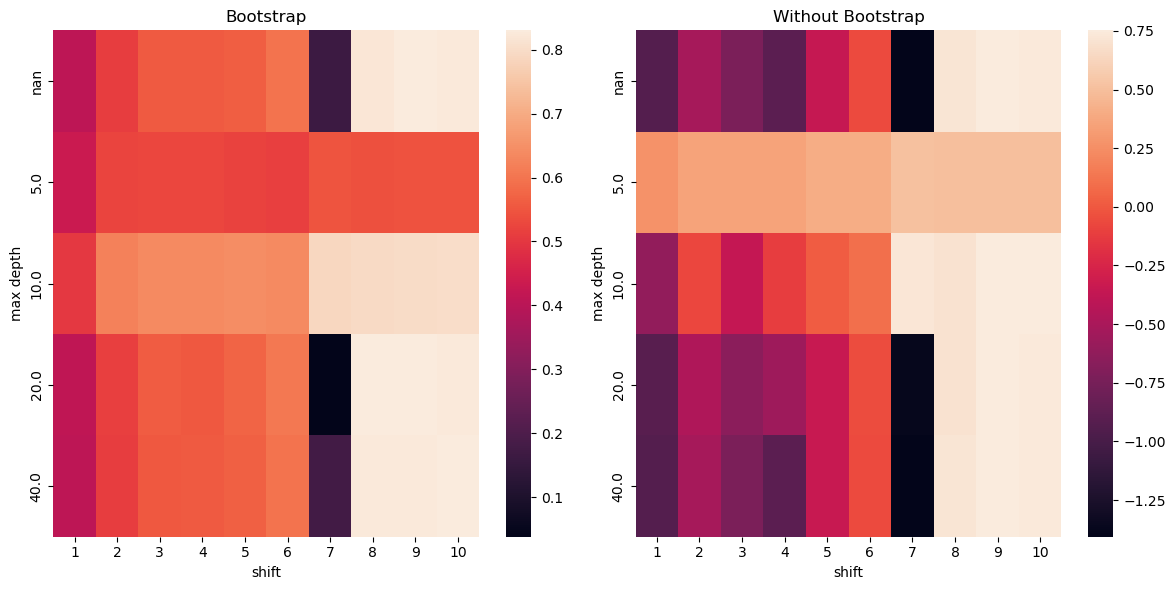

In [25]:
plt.figure(figsize=(12, 6))

true_df = results_df[results_df['bootstrap']==True].pivot(index='max depth', columns='shift', values='validation score')
plt.subplot(1, 2, 1)
sns.heatmap(true_df)
plt.title('Bootstrap')

false_df = results_df[results_df['bootstrap']==False].pivot(index='max depth', columns='shift', values='validation score')
plt.subplot(1, 2, 2)
sns.heatmap(false_df)
plt.title('Without Bootstrap')

plt.tight_layout()
plt.savefig('output/rf_plot.png')
plt.show()

# Neural Network

Note that unlike the previous 2 models, neural networks are sensitive to feature scales, hence we need to standardize/normalize the data. From the previous heatmap we note that some data like new deaths are sparse (many zeros), this will make normalization problematic. Hence we decide to scale it to min 0 max 1 (and not variance normalization). We fit the scaler to the train/validation set to prevent data leakage.

Due to longer computation time, we do not perform walk forward validation for neural networks but rather just split and take a 1 train and 1 validation set chronologically (with validation coming after train set). 

We start with a simple architecture. 

Num of layers: [1,2,3]

Num of units/layer: [256, 512, 1024]

lr: 0.0001

shift: [1, 5, 10]

Up to 200 epochs

In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.callbacks import EarlyStopping, BackupAndRestore, CSVLogger, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [32]:
import keras

def train_nn(model, train_df, shift, epochs,
            chkpt_path, best_path, log_path, patience,
            lr=0.0001, img_path=None):
    '''
    Trains a model with Adam and MSE loss, saving backup checkpoints if training is interrupted.
    Also saves best epoch weights in terms of validation loss and has early stopping.
    Plots the training and validation loss and optionally saves the plot.
    Loads the best model weights and returns the model

    Inputs:
    model is the keras model architecture to train
    train_df is the full train/val dataframe (before rescalingn and splitting into x and y)
    shift is the number of days to shift for time dependent variables
    epochs is the maximum number of epochs to train until
    chkpt_path is the path for saving backups in case training is interrupted
    best_path is the path of the best epoch weights
    log_path is the path that the training logs are stored
    lr is the learning rate of Adam
    patience is the number of epochs befor early stopping kics in
    img_path is the path to save the training/val loss plot. If set to None, will not save
    '''
    # Shift and compute the train/val sets (No walk forward validation due to compute limitations)
    # Create lag features for predictors
    lag_df = add_shift_predictors(train_df, shift)

    # Split into train and validation
    train_df = lag_df.groupby('iso_code').apply(lambda group: group.iloc[:9*len(group.index)//10,:])
    val_df = lag_df.groupby('iso_code').apply(lambda group: group.iloc[9*len(group.index)//10:,:])

    # Drop irrelevant columns to get x,y
    x_train, y_train = split_xy(train_df)
    x_val, y_val = split_xy(val_df)

    # Compile and fit the Model
    optim = Adam(learning_rate=lr)
    model.compile(optimizer=optim, loss=tf.keras.losses.MeanSquaredError())

    early_stopping = EarlyStopping(patience=patience)
    restore_callback = BackupAndRestore(backup_dir=chkpt_path, save_freq=1,
                                        delete_checkpoint = False)
    best_chkpt = ModelCheckpoint(
        best_path,
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=False,
        save_freq='epoch'
    )

    logger_callback = CSVLogger(log_path, append=True)

    # Read previous losses if they exist
    if os.path.exists(log_path):
        try:
            previous_training_logs = pd.read_csv(log_path)
            print(previous_training_logs)
            if len(previous_training_logs.index) < epochs:
                history = model.fit(x=x_train, y=y_train, epochs=epochs, validation_data=(x_val, y_val),
                                    callbacks=[early_stopping, restore_callback, logger_callback, best_chkpt])
        except:
            print('Failed to read previous logs. May not exist or may be an error.')
            history = model.fit(x=x_train, y=y_train, epochs=epochs, validation_data=(x_val, y_val),
                                    callbacks=[early_stopping, restore_callback, logger_callback, best_chkpt])
    else:
        history = model.fit(x=x_train, y=y_train, epochs=epochs, validation_data=(x_val, y_val),
                                    callbacks=[early_stopping, restore_callback, logger_callback, best_chkpt])


    # Plot the validation loss and traininig loss across different epochs
    updated_logs = pd.read_csv(log_path)
    plt.plot(updated_logs['epoch'], updated_logs['loss'], label='Training loss')
    plt.plot(updated_logs['epoch'], updated_logs['val_loss'], label='Validation loss')

    # Often the loss in the first few epochs are very large, and it's not worth including
    # We take largest epoch loss *1.1 as the top of the graph
    plt.ylim(top=(max(updated_logs['val_loss'][3:]*1.1 + updated_logs['loss'][3:]*1.1)))
    plt.legend()
    if img_path != None:
        plt.savefig(img_path)
    plt.show()

    # Loads best model weights and evaluates on validation set
    model.load_weights(best_path)
    y_pred = model.predict(x_val)
    scorer = keras.metrics.R2Score()
    scorer.update_state(tf.cast(y_val, tf.float32), y_pred)

    val_score = scorer.result()

    return model, val_score


   epoch      loss  val_loss
0      0  0.216369  0.226902
1      1  0.198041  0.208080
2      2  0.180891  0.190459
3      3  0.164866  0.173974


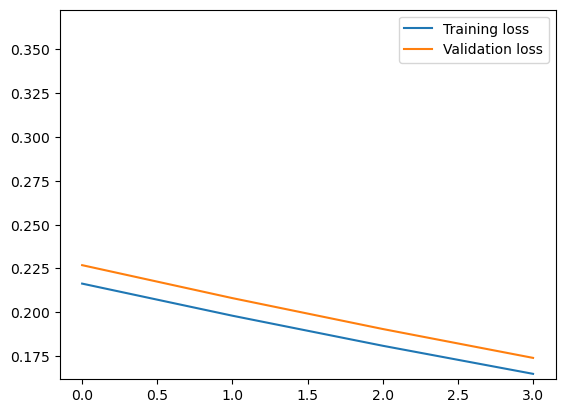

33/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

c:\Users\winfr\anaconda3\envs\tf\lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
-14434.859


In [33]:
shift_test = 2
# Test function above
test_model = models.Sequential([
    layers.Input(shape=(12+8*shift_test,)),
    layers.Dense(1, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1, activation='relu'), 
    layers.Dense(3, activation='sigmoid')
], name='test_model')
test_model, val_score = train_nn(test_model, train_df, shift=shift_test, epochs=4,
            chkpt_path='output/nn/test_model/backup_chkpt', best_path='output/nn/test_model/best_chkpt.keras', log_path='output/nn/test_model/test_log.csv', 
            patience=3, lr=0.0001, img_path=None)
print(val_score.numpy())

In [62]:
layer_list = [1, 2, 3]
unit_list = [256, 512, 1024]
lr = 0.0001
shift_list = [1, 5, 10]

results_path = 'output/nn_results.csv'
if os.path.exists(results_path):
    results_df = pd.read_csv(results_path)
else:
    results_scores = []
    for layer in layer_list:
        for unit in unit_list:
            for shift in shift_list:
                # Define model based on hyperparameters
                model = models.Sequential()
                model.add(layers.Input(shape=(12+8*shift,)))
                for _ in range(layer):
                    model.add(layers.Dense(unit, activation='relu'))
                    model.add(layers.Dropout(0.1))
                model.add(layers.Dense(3, activation='sigmoid'))
                
                dir_path = f'output/nn/{layer}layer_{unit}unit_{shift}shift'
                if not os.path.exists(dir_path):
                    os.makedirs(dir_path)
                model, val_score = train_nn(model, train_df, shift=shift, epochs=50,
                                    chkpt_path=dir_path+'/backup_chkpt', best_path=dir_path+'/best_chkpt.keras', log_path=dir_path+'/test_log.csv', 
                                    patience=5, lr=0.001, img_path=dir_path+'/loss.png')
                results_scores.append({
                'shift': shift,
                'units per layer': unit,
                'number of hidden layers': layer,
                'validation score': val_score.numpy()
                })
    # Convert scores to DataFrame
    results_df = pd.DataFrame(results_scores)
    results_df.to_csv(results_path)

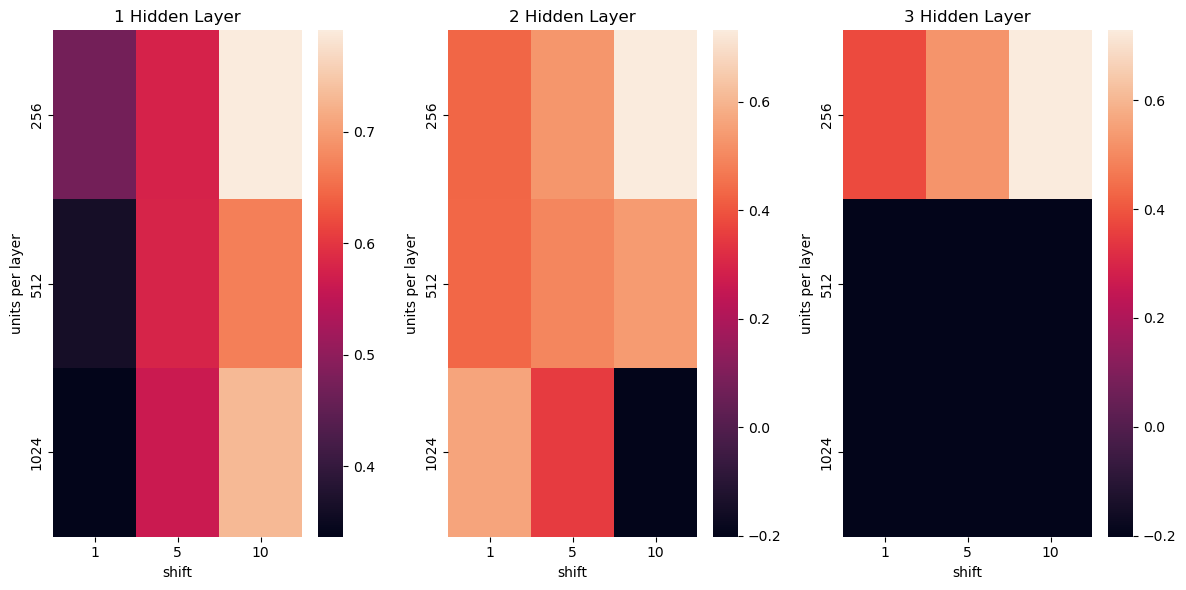

In [63]:
plt.figure(figsize=(12, 6))

temp_df = results_df[results_df['number of hidden layers']==1].pivot(index='units per layer', columns='shift', values='validation score')
plt.subplot(1, 3, 1)
sns.heatmap(temp_df)
plt.title('1 Hidden Layer')

temp_df = results_df[results_df['number of hidden layers']==2].pivot(index='units per layer', columns='shift', values='validation score')
plt.subplot(1, 3, 2)
sns.heatmap(temp_df)
plt.title('2 Hidden Layer')

temp_df = results_df[results_df['number of hidden layers']==3].pivot(index='units per layer', columns='shift', values='validation score')
plt.subplot(1, 3, 3)
sns.heatmap(temp_df)
plt.title('3 Hidden Layer')

plt.tight_layout()
plt.savefig('output/nn_plot.png')
plt.show()

# Evaluation on Test Set

We first evaluate our best linear model LASSO alpha 10 and 1 shift.

In [57]:
# Evaluate linear model
results_path = 'output/lm_results.csv'
results_df = pd.read_csv(results_path)

# Get best hyperparameters
best = results_df.iloc[results_df['validation score'].idxmax(), :]
shift = best['shift']
type = best['regularisation type']
alpha = best['regularisation magnitude']
val_score = best['validation score']

print(shift, type, alpha, val_score)

lag_train_df = add_shift_predictors(train_df, shift)
lag_test_df = add_shift_predictors(test_df, shift)

# Drop irrelevant columns to get x,y
x_train, y_train = split_xy(lag_train_df)
x_test, y_test = split_xy(lag_test_df)

if type == 'lasso':
    model = linear_model.LassoLars(alpha=alpha)
else:
    model = linear_model.Ridge(alpha=alpha)

model.fit(x_train, y_train)
test_score = model.score(x_test, y_test)
print(test_score)

all_models_results = []

all_models_results.append({
                'Model Type': f'Linear model; shift {shift}; regularisation type {type}; alpha {alpha}',
                'Validation Score': val_score,
                'Test Score': test_score
                })


10 ridge 0.001 0.9306872764278664
0.9442603134660129


We now evaluate our Random Forest model with max depth of 10, 2 shift and bootstrapped.

In [58]:
# Evaluate Random Forest Model
results_path = 'output/rf_results.csv'
results_df = pd.read_csv(results_path)

best = results_df.iloc[results_df['validation score'].idxmax(), :]
shift = best['shift']
max_depth = int(best['max depth'])
bootstrap = best['bootstrap']
val_score = best['validation score']
print(shift, max_depth, bootstrap, val_score)

lag_train_df = add_shift_predictors(train_df, shift)
lag_test_df = add_shift_predictors(test_df, shift)

# Drop irrelevant columns to get x,y
x_train, y_train = split_xy(lag_train_df)
x_test, y_test = split_xy(lag_test_df)

model = RandomForestRegressor(max_depth=max_depth, bootstrap=bootstrap, random_state=1843091, n_jobs=-1)
model.fit(x_train, y_train)
test_score = model.score(x_test, y_test)
print(test_score)

all_models_results.append({
                'Model Type': f'Random Forest model; shift {shift}; max depth {max_depth}; bootstrap {bootstrap}',
                'Validation Score': val_score,
                'Test Score': test_score
                })

10 40 True 0.8300999675367853
0.9537239114369956


In [59]:
# Evaluate Random Forest Model
results_path = 'output/nn_results.csv'
results_df = pd.read_csv(results_path)

best = results_df.iloc[results_df['validation score'].idxmax(), :]
shift = best['shift'].astype(np.int32)
unit = best['units per layer'].astype(np.int32)
layer = best['number of hidden layers'].astype(np.int32)
val_score = best['validation score']
print(shift, unit, layer)


# Create lag features for predictors
lag_train_df = add_shift_predictors(train_df, shift)
lag_test_df = add_shift_predictors(test_df, shift)

# Drop irrelevant columns to get x,y
x_train, y_train = split_xy(lag_train_df)
x_test, y_test = split_xy(lag_test_df)

# Define model based on hyperparameters
model = models.Sequential()
model.add(layers.Input(shape=(12+8*shift,)))
for _ in range(layer):
    model.add(layers.Dense(unit, activation='relu'))
    model.add(layers.Dropout(0.1))
model.add(layers.Dense(3, activation='sigmoid'))

weight_path = f'output/nn/{layer}layer_{unit}unit_{shift}shift/best_chkpt.keras'
model.load_weights(weight_path)

y_pred = model.predict(x_test)
scorer = keras.metrics.R2Score()
scorer.update_state(tf.cast(y_test, tf.float32), y_pred)

test_score = scorer.result()
print(test_score)

all_models_results.append({
                'Model Type': f'MLP model; shift {shift}; {layer} hidden layers; {unit} units per layer',
                'Validation Score': val_score,
                'Test Score': test_score.numpy()
                })

10 256 1
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
tf.Tensor(0.91194344, shape=(), dtype=float32)


In [60]:
results_df = pd.DataFrame(all_models_results)
results_df.to_csv('output/test_scores.csv')

In [61]:
results_df

,Model Type,Validation Score,Test Score
0,Linear model; shift 10; regularisation type ri...,0.930687,0.944260
1,Random Forest model; shift 10; max depth 40; b...,0.830100,0.953724
2,MLP model; shift 10; 1 hidden layers; 256 unit...,0.790785,0.911943
